In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

from Functions.UNSW_DF import * 

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("../KNN/K_SCORES(1-70).csv")
df.drop("error", axis=1, inplace=True)

In [3]:
df

,K,train_acc,test_acc,precision,F1,recall
0,1,0.997120,0.852791,0.814889,0.876412,0.947984
1,2,0.965216,0.871083,0.857034,0.887027,0.919196
2,3,0.967167,0.850896,0.805825,0.876469,0.960690
3,4,0.958498,0.863188,0.831969,0.883449,0.941719
4,5,0.958766,0.846281,0.797791,0.873688,0.965543
...,...,...,...,...,...,...
65,66,0.941679,0.827297,0.766648,0.862848,0.986654
66,67,0.941354,0.825839,0.764631,0.861980,0.987735
67,68,0.941554,0.827054,0.766285,0.862710,0.986897
68,69,0.941331,0.825791,0.764515,0.861966,0.987889


In [4]:
df = pd.melt(df, id_vars="K", var_name="metric", value_name="score")
df

,K,metric,score
0,1,train_acc,0.997120
1,2,train_acc,0.965216
2,3,train_acc,0.967167
3,4,train_acc,0.958498
4,5,train_acc,0.958766
...,...,...,...
345,66,recall,0.986654
346,67,recall,0.987735
347,68,recall,0.986897
348,69,recall,0.987889


In [8]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [9]:
sns.set(rc={"figure.figsize":(60, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

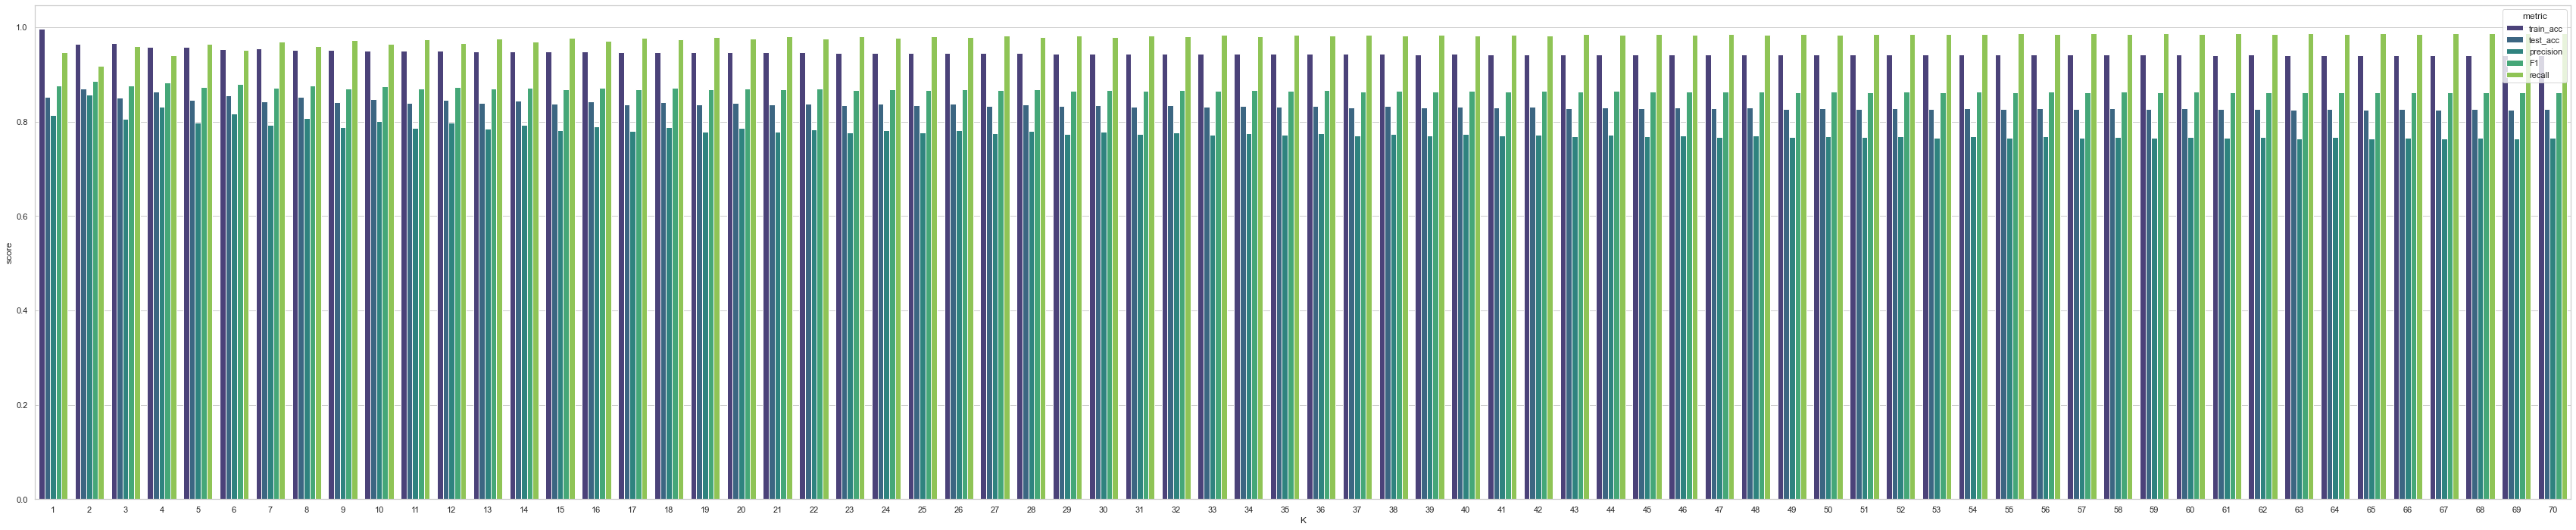

In [10]:
ax = sns.barplot(x='K', y='score', hue='metric', data=df, palette="viridis")
#show values on barplot
#show_values(ax, orient="v")

#for container in ax.containers:
#    ax.bar_label(container)
#    container.set_rotation(45)
#ax.figure.savefig("performance_evaluation_v3.png", dpi=400)